In [ ]:
w!mkdir data/
!wget https://raw.githubusercontent.com/shivamk0209/CL653AiMl_proj/main/PEM%20dataset.csv

mkdir: cannot create directory ‘data/’: File exists
--2024-04-25 15:18:20--  https://raw.githubusercontent.com/shivamk0209/CL653AiMl_proj/main/PEM%20dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41695 (41K) [text/plain]
Saving to: ‘PEM dataset.csv.1’

PEM dataset.csv.1   100%[===================>]  40.72K  --.-KB/s    in 0.01s   

2024-04-25 15:18:20 (3.94 MB/s) - ‘PEM dataset.csv.1’ saved [41695/41695]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

shivam_df= pd.read_csv('/content/PEM dataset.csv' )
shivam_df.head()



,current_density,cell_voltage,power_density,pressure,relative_humidity
0,3320.0,0.235,779.0,5.0,30.0
1,3110.0,0.285,886.0,5.0,30.0
2,2890.0,0.334,966.0,5.0,30.0
3,2630.0,0.385,1010.0,5.0,30.0
4,2360.0,0.435,1030.0,5.0,30.0


In [ ]:


# Step 1: Check for null values
print("Null Values:")
print(shivam_df.isnull().sum())

# Step 2: Replace null values with NaN
shivam_df.replace("", float("NaN"), inplace=True)

# Step 3: Check for missing values (NaNs)
print("\nMissing Values (NaNs):")
print(shivam_df.isnull().sum())

# Step 4: Replace missing values with the mean of each column
shivam_df.fillna(shivam_df.mean(), inplace=True)

# Check again for missing values (to confirm they've been filled)
print("\nMissing Values after Filling with Mean:")
print(shivam_df.isnull().sum())

Null Values:
current_density        0
cell_voltage           0
power_density          0
pressure             274
relative_humidity    274
dtype: int64

Missing Values (NaNs):
current_density        0
cell_voltage           0
power_density          0
pressure             274
relative_humidity    274
dtype: int64

Missing Values after Filling with Mean:
current_density      0
cell_voltage         0
power_density        0
pressure             0
relative_humidity    0
dtype: int64


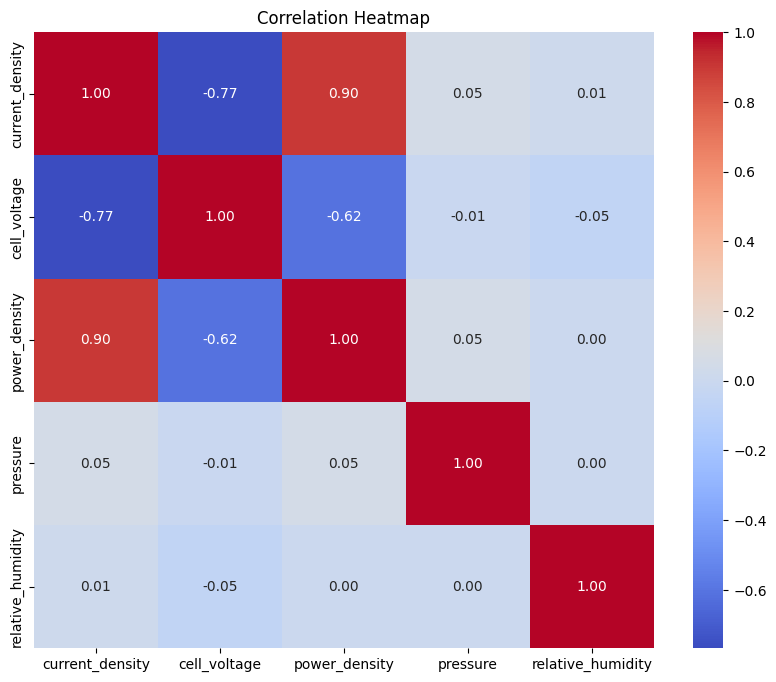

In [ ]:
# Correlation heatmap
correlation_matrix = shivam_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



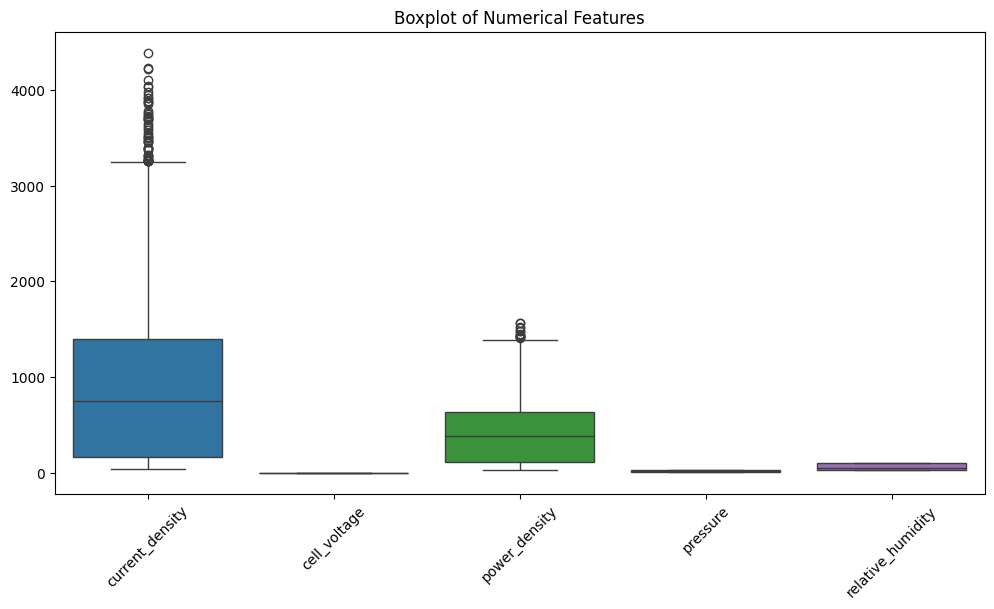

In [ ]:
# Boxplot for each numerical feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=shivam_df, orient="v")
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()




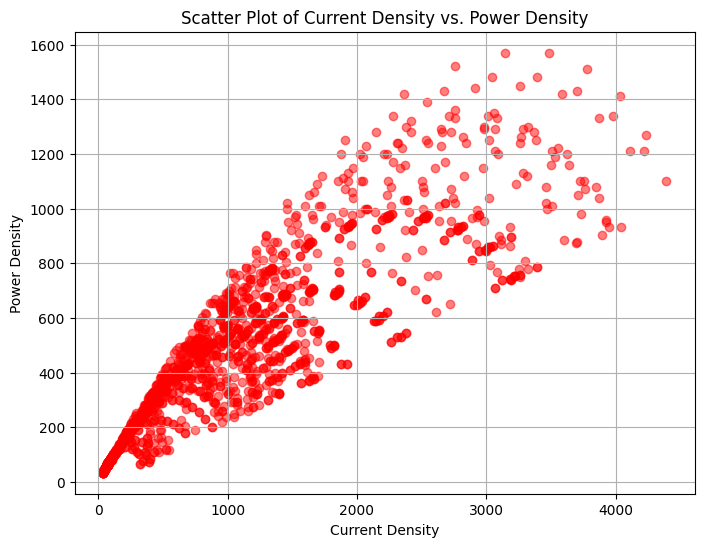

In [ ]:

# Extract the features for the scatter plot
x_values = shivam_df['current_density']
y_values = shivam_df['power_density']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='red', alpha=0.5)  # alpha controls transparency
plt.title('Scatter Plot of Current Density vs. Power Density')
plt.xlabel('Current Density')
plt.ylabel('Power Density')
plt.grid(True)
plt.show()

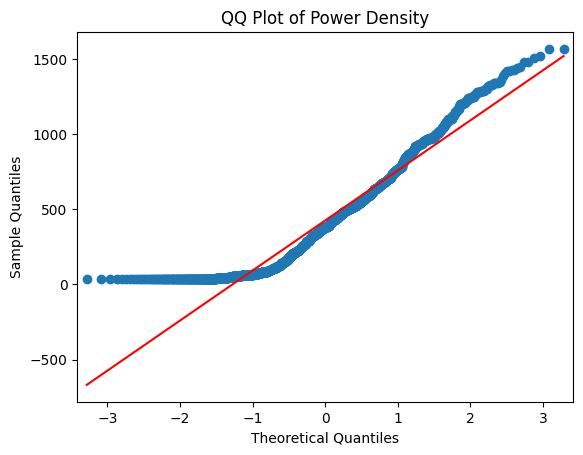

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Perform a quantile-quantile (QQ) plot
sm.qqplot(shivam_df['power_density'], line='s')
plt.title('QQ Plot of Power Density')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

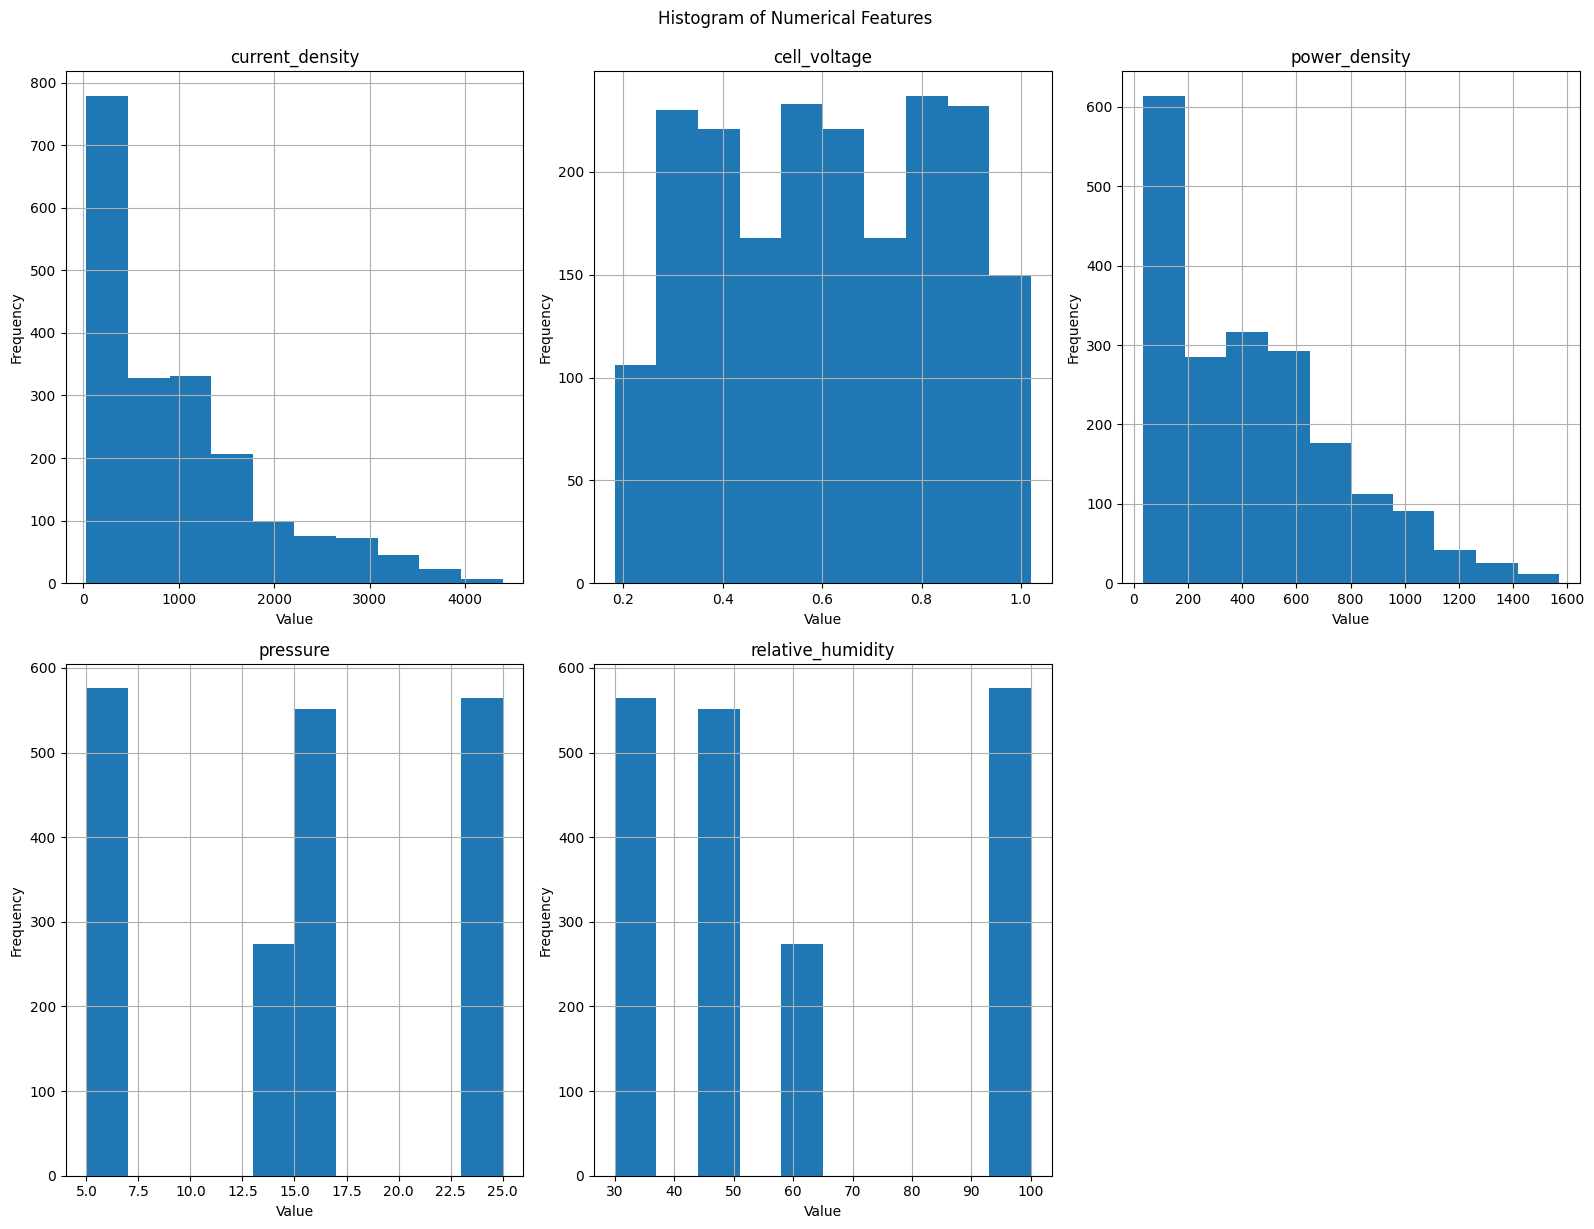

In [ ]:

# Calculate the number of rows and columns for subplots
num_features = len(shivam_df.columns)
num_cols = 3  # Adjust the number of columns as needed
num_rows = (num_features - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Flatten axes if there's only one row or one column
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)

# Plot histograms for each numerical feature
for i, col in enumerate(shivam_df.columns):
    ax = axes[i // num_cols, i % num_cols]
    shivam_df[col].hist(ax=ax)
    ax.set_title(col)
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Value")

# Remove empty subplots if there are any
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show plot
plt.suptitle("Histogram of Numerical Features", y=1.02)
plt.show()

In [ ]:

# Function to detect and remove outliers using IQR
def remove_outliers_iqr(shivam_df, columns):
    for col in columns:
        q1 = shivam_df[col].quantile(0.25)
        q3 = shivam_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        shivam_df = shivam_df[(shivam_df[col] >= lower_bound) & (shivam_df[col] <= upper_bound)]
    return shivam_df

# Columns to check for outliers
columns_to_check = ['current_density', 'cell_voltage', 'power_density', 'pressure', 'relative_humidity']  # Replace with the column names you want to check for outliers

# Remove outliers
data_no_outliers = remove_outliers_iqr(shivam_df, columns_to_check)

# Print the shape of the original and outlier-removed dataset
print("Original Dataset Shape:", shivam_df.shape)
print("Dataset Shape after Removing Outliers:", data_no_outliers.shape)


Original Dataset Shape: (1966, 5)
Dataset Shape after Removing Outliers: (1899, 5)


In [ ]:
data_no_outliers.describe()

,current_density,cell_voltage,power_density,pressure,relative_humidity
count,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000
mean,868.752317,0.621101,400.184202,14.858343,60.229087
std,792.261976,0.224604,304.969562,7.601205,27.539932
min,35.500000,0.183000,33.700000,5.000000,30.000000
25%,142.500000,0.429000,109.000000,5.000000,30.000000
50%,702.000000,0.628000,368.000000,15.000000,50.000000
75%,1330.000000,0.824000,591.500000,25.000000,100.000000
max,3250.000000,1.020000,1320.000000,25.000000,100.000000


In [ ]:
# since only 2 features are significantly affecting the target value  hence applying PCA for dimentionality reduction

# Separate features and target variable (if any)
X = data_no_outliers.drop(columns=['power_density'])  # Replace 'target_column' with the name of your target variable column, if applicable
y = data_no_outliers['power_density']  # If 'target_column' exists

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)



Explained Variance Ratio:
[0.44647032 0.25047616]


In [ ]:
from sklearn.linear_model import LinearRegression



# Ensure that the target variable aligns with the transformed features
target_variable = data_no_outliers['power_density'].iloc[:len(X_pca)]  # Use the same number of samples as transformed features

# Split the data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, target_variable, test_size=0.2, random_state=79)

# Train the model
model = LinearRegression()  # Replace with your chosen regression model
model.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Linear Regression - Mean Absolute Error:", mae)
print("Linear Regression - Root Mean Squared Error:", rmse)
print("Linear Regression - R2 score:",r2_score(y_test,y_pred))



Linear Regression - Mean Absolute Error: 35.06344414761192
Linear Regression - Root Mean Squared Error: 186.30317953544622
Linear Regression - R2 score: 0.6539774937439295


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a Support Vector Regression model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Fit the model to the training data
svr_model.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test_pca)

# Calculate the performance metrics
mae = mean_absolute_error(y_test, y_pred_svr)
rmse = mean_squared_error(y_test, y_pred_svr, squared=False)
r2 = r2_score(y_test, y_pred_svr)

# Print the results
print("Support Vector Regression - Mean Absolute Error:", mae)
print("Support Vector Regression - Root Mean Squared Error:", rmse)
print("Support Vector Regression - R-squared:", r2)


Support Vector Regression - Mean Absolute Error: 114.56373279106211
Support Vector Regression - Root Mean Squared Error: 182.0912308255648
Support Vector Regression - R-squared: 0.669446411121527


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = RandomForestRegressor()

# Train the model
model.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = model.predict(X_test_pca)

# Calculate the performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Random Forest Regression - Mean Absolute Error:", mae)
print("Random Forest Regression - Root Mean Squared Error:", rmse)
print("Random Forest Regression - R-squared:", r2)


Random Forest Regression - Mean Absolute Error: 39.780392105263154
Random Forest Regression - Root Mean Squared Error: 94.3491731781332
Random Forest Regression - R-squared: 0.9112557934106071


In [ ]:


# Gradient Boosting Regression Model
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
gbr_model = GradientBoostingRegressor()

# Fit the model to the training data
gbr_model.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_gbr = gbr_model.predict(X_test_pca)

# Calculate the performance metrics
mae = mean_absolute_error(y_test, y_pred_gbr)
rmse = mean_squared_error(y_test, y_pred_gbr, squared=False)
r2 = r2_score(y_test, y_pred_gbr)

# Print the results
print("Gradient Boosting Regression - Mean Absolute Error:", mae)
print("Gradient Boosting Regression - Root Mean Squared Error:", rmse)
print("Gradient Boosting Regression - R-squared:", r2)


Gradient Boosting Regression - Mean Absolute Error: 79.53467069077897
Gradient Boosting Regression - Root Mean Squared Error: 132.1864175852248
Gradient Boosting Regression - R-squared: 0.8258042802963101


In [ ]:


# Import necessary libraries
from sklearn.ensemble import AdaBoostRegressor

# Instantiate the AdaBoost model
ada_model = AdaBoostRegressor()

# Fit the model to the training data
ada_model.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_ada = ada_model.predict(X_test_pca)

# Calculate the performance metrics
mae = mean_absolute_error(y_test, y_pred_ada)
rmse = mean_squared_error(y_test, y_pred_ada, squared=False)
r2 = r2_score(y_test, y_pred_ada)

# Print the results
print("AdaBoost Regression - Mean Absolute Error:", mae)
print("AdaBoost Regression - Root Mean Squared Error:", rmse)
print("AdaBoost Regression - R-squared:", r2)


AdaBoost Regression - Mean Absolute Error: 118.29152189306042
AdaBoost Regression - Root Mean Squared Error: 178.69080591517923
AdaBoost Regression - R-squared: 0.6816768462592706


In [ ]:


# Import necessary libraries
from xgboost import XGBRegressor

# Instantiate the XGBoost model
xgb_model = XGBRegressor()

# Fit the model to the training data
xgb_model.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_pca)

# Calculate the performance metrics
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2 = r2_score(y_test, y_pred_xgb)

# Print the results
print("XGBoost Regression - Mean Absolute Error:", mae)
print("XGBoost Regression - Root Mean Squared Error:", rmse)
print("XGBoost Regression - R-squared:", r2)


XGBoost Regression - Mean Absolute Error: 35.06344414761192
XGBoost Regression - Root Mean Squared Error: 78.84646217979096
XGBoost Regression - R-squared: 0.9380233301892036


In [ ]:


# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Linear Regression
param_grid_lr = {}

# Define the parameter grid for Support Vector Regression
param_grid_svr = {'C': [1, 10, 100, 1000],
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                  'epsilon': [0.01, 0.1, 0.5, 1]}

# Define the parameter grid for Random Forest Regression
param_grid_rf = {'n_estimators': [10, 50, 100, 150, 200],
                  'max_depth': [None, 10, 20, 30],
                  'min_samples_split': [2, 5, 10]}

# Define the parameter grid for Gradient Boosting Regression
param_grid_gbr = {'n_estimators': [10, 50, 100, 150, 200],
                  'learning_rate': [0.01, 0.1, 0.3, 0.5],
                  'subsample': [0.4, 0.7, 0.9, 1.0],
                  'min_samples_split': [2, 3, 5, 7]}

# Define the parameter grid for AdaBoost Regression
param_grid_ada = {'n_estimators': [10, 50, 100, 150, 200],
                  'learning_rate': [0.01, 0.1, 0.3, 0.5]}

# Define the parameter grid for XGBoost Regression
param_grid_xgb = {'n_estimators': [50, 100, 150, 200],
                  'max_depth': [2, 4, 6, 8],
                  'learning_rate': [0.01, 0.1, 0.3],
                  'subsample': [0.5, 0.75, 1.0]}

# Perform grid search for each model
grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5)
grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5)
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
grid_search_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, cv=5)
grid_search_ada = GridSearchCV(AdaBoostRegressor(), param_grid_ada, cv=5)
grid_search_xgb = GridSearchCV(XGBRegressor(), param_grid_xgb, cv=5)

# Fit the models to the training data
grid_search_lr.fit(X_train_pca, y_train)
grid_search_svr.fit(X_train_pca, y_train)
grid_search_rf.fit(X_train_pca, y_train)
grid_search_gbr.fit(X_train_pca, y_train)
grid_search_ada.fit(X_train_pca, y_train)
grid_search_xgb.fit(X_train_pca, y_train)

# Print the best parameters for each model
print("Best parameters for Linear Regression:", grid_search_lr.best_params_)
print("Best parameters for Support Vector Regression:", grid_search_svr.best_params_)
print("Best parameters for Random Forest Regression:", grid_search_rf.best_params_)
print("Best parameters for Gradient Boosting Regression:", grid_search_gbr.best_params_)
print("Best parameters for AdaBoost Regression:", grid_search_ada.best_params_)
print("Best parameters for XGBoost Regression:", grid_search_xgb.best_params_)

# Predict on the test set using the best parameters
y_pred_lr = grid_search_lr.predict(X_test_pca)
y_pred_svr = grid_search_svr.predict(X_test_pca)
y_pred_rf = grid_search_rf.predict(X_test_pca)
y_pred_gbr = grid_search_gbr.predict(X_test_pca)
y_pred_ada = grid_search_ada.predict(X_test_pca)
y_pred_xgb = grid_search_xgb.predict(X_test_pca)

# Calculate the performance metrics for each model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
r2_gbr = r2_score(y_test, y_pred_gbr)

mae_ada = mean_absolute_error(y_test, y_pred_ada)
rmse_ada = mean_squared_error(y_test, y_pred_ada, squared=False)
r2_ada = r2_score(y_test, y_pred_ada)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the performance metrics for each model
print("\nLinear Regression - Best Parameters:")
print("Mean Absolute Error:", mae_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R-squared:", r2_lr)

print("\nSupport Vector Regression - Best Parameters:")
print("Mean Absolute Error:", mae_svr)
print("Root Mean Squared Error:", rmse_svr)
print("R-squared:", r2_svr)

print("\nRandom Forest Regression - Best Parameters:")
print("Mean Absolute Error:", mae_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)

print("\nGradient Boosting Regression - Best Parameters:")
print("Mean Absolute Error:", mae_gbr)
print("Root Mean Squared Error:", rmse_gbr)
print("R-squared:", r2_gbr)

print("\nAdaBoost Regression - Best Parameters:")
print("Mean Absolute Error:", mae_ada)
print("Root Mean Squared Error:", rmse_ada)
print("R-squared:", r2_ada)

print("\nXGBoost Regression - Best Parameters:")
print("Mean Absolute Error:", mae_xgb)
print("Root Mean Squared Error:", rmse_xgb)
print("R-squared:", r2_xgb)


Best parameters for Linear Regression: {}
Best parameters for Support Vector Regression: {'C': 1000, 'epsilon': 0.1, 'kernel': 'rbf'}
Best parameters for Random Forest Regression: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 50}
Best parameters for Gradient Boosting Regression: {'learning_rate': 0.3, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 1.0}
Best parameters for AdaBoost Regression: {'learning_rate': 0.01, 'n_estimators': 150}
Best parameters for XGBoost Regression: {'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 100, 'subsample': 1.0}

Linear Regression - Best Parameters:
Mean Absolute Error: 131.07014033765907
Root Mean Squared Error: 186.30317953544622
R-squared: 0.6539774937439295

Support Vector Regression - Best Parameters:
Mean Absolute Error: 114.8495803260689
Root Mean Squared Error: 181.45930438700566
R-squared: 0.6717367256492532

Random Forest Regression - Best Parameters:
Mean Absolute Error: 38.981423684210526
Root Mean Squared Erro